In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [32]:
df = pd.read_csv("C:/Users/sence/OneDrive/Masaüstü/practice-data sciente/mall_customer/Mall_Customers.csv")

In [33]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [34]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


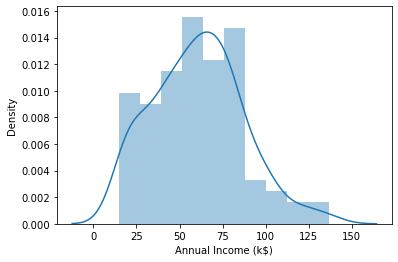

In [35]:
sns.distplot(df['Annual Income (k$)'])

In [36]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

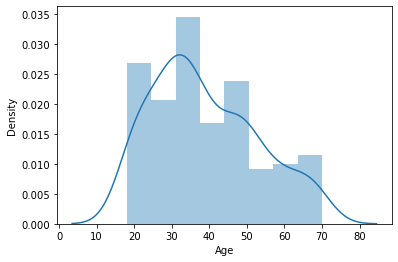

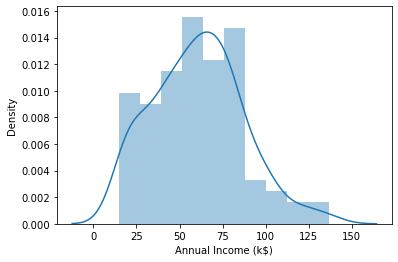

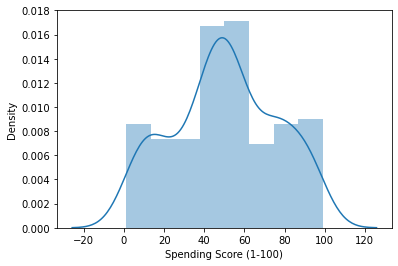

In [37]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

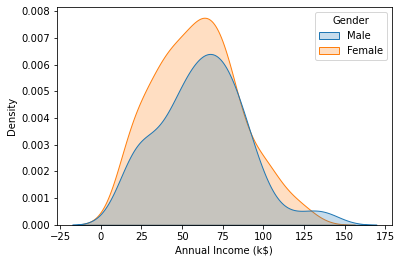

In [38]:
sns.kdeplot(data=df, x='Annual Income (k$)', shade=True, hue='Gender')

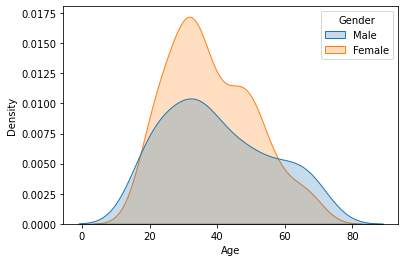

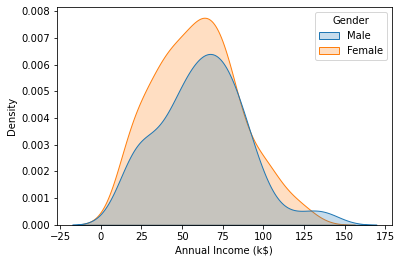

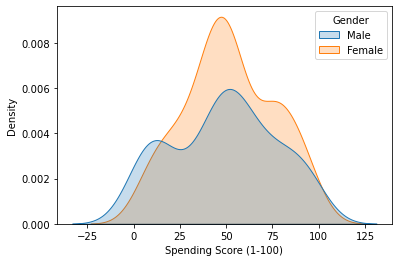

In [39]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, shade=True, hue='Gender')

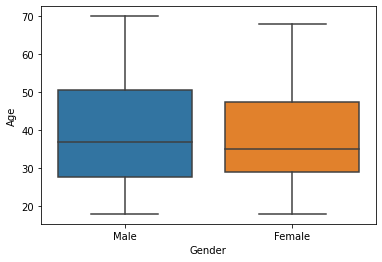

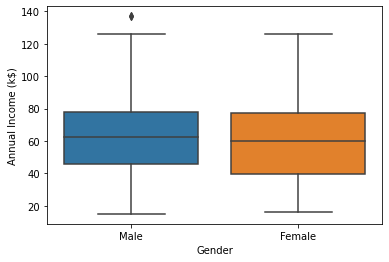

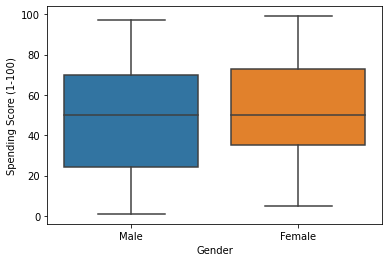

In [40]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender',y=df[i])

In [41]:
df["Gender"].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

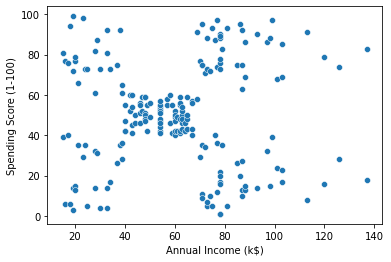

In [42]:
sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)')

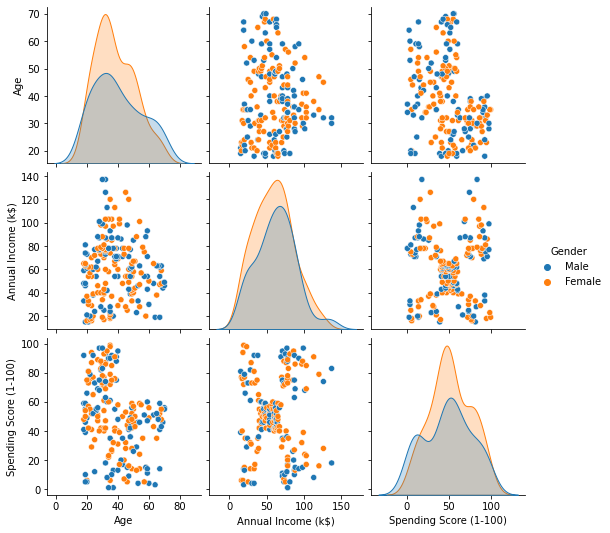

In [45]:
df_dropped = df.drop('CustomerID', axis = 1)
sns.pairplot(df_dropped, hue = 'Gender')

In [47]:
df_dropped.groupby(['Gender'])['Age', 'Annual Income (k$)',
                       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [48]:
df_dropped.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


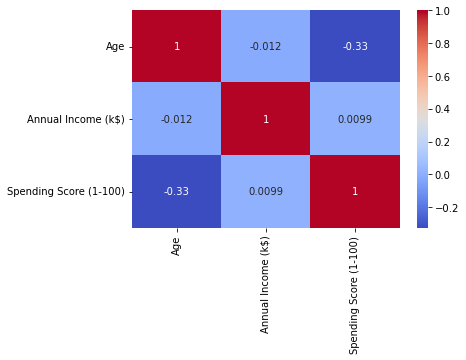

In [49]:
sns.heatmap(df_dropped.corr(),annot=True,cmap='coolwarm')

# Clustering - Univariate, Bivariate, Multivariate

In [83]:
 clustering1 = KMeans(n_clusters=3)

In [84]:
clustering1.fit(df_dropped[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [85]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [86]:
df_dropped['Income Cluster'] = clustering1.labels_
df_dropped.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [87]:
df_dropped['Income Cluster'].value_counts()

2    90
1    74
0    36
Name: Income Cluster, dtype: int64

In [88]:
clustering1.inertia_

23517.33093093093

In [89]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_dropped[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [90]:
intertia_scores

[137277.28000000003,
 48660.88888888888,
 23517.33093093093,
 13278.112713472487,
 8481.496190476191,
 5050.9047619047615,
 3941.4163614163617,
 2862.2504273504273,
 2193.0907275730806,
 1770.6341269841269]

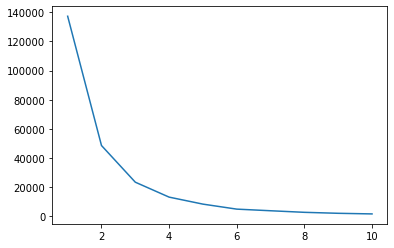

In [91]:
plt.plot(range(1,11),intertia_scores)

In [92]:
df_dropped.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [93]:
df_dropped.groupby('Income Cluster')['Age', 'Annual Income (k$)',
                                     'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


# Bivariate Clustering

In [100]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df_dropped[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
df_dropped['Spending and Income Cluster'] = clustering2.labels_
df_dropped.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,1
1,Male,21,15,81,1,4
2,Female,20,16,6,1,1
3,Female,23,16,77,1,4
4,Female,31,17,40,1,1


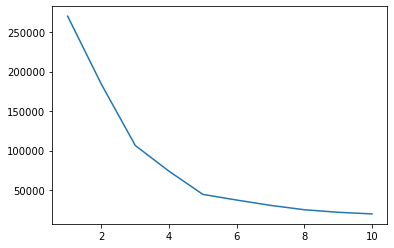

In [101]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df_dropped[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [110]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers.head()

,x,y
0,55.296296,49.518519
1,26.304348,20.913043
2,86.538462,82.128205
3,88.200000,17.114286
4,25.727273,79.363636


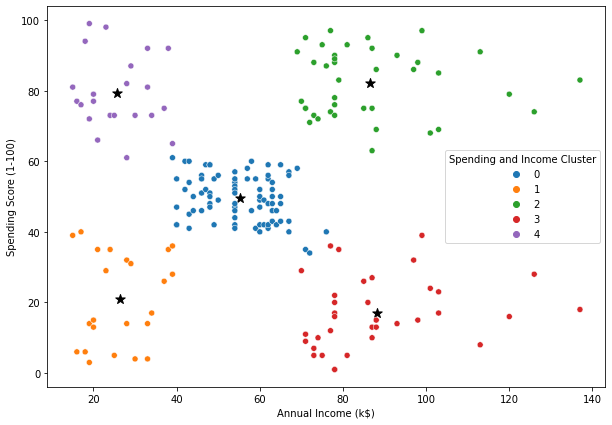

In [139]:
plt.figure(figsize=(10,7))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df_dropped, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Spending and Income Cluster', palette='tab10')
plt.savefig('Clustering_bivaraiate.png')

In [114]:
pd.crosstab(df_dropped['Spending and Income Cluster'],df['Gender'],
            normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.608696,0.391304
2,0.538462,0.461538
3,0.457143,0.542857
4,0.590909,0.409091


In [115]:
df_dropped.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
                                     'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,45.217391,26.304348,20.913043
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,25.272727,25.727273,79.363636


# Multivariate Clustering

In [122]:
scale = StandardScaler()

In [123]:
df_dropped.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,1
1,Male,21,15,81,1,4
2,Female,20,16,6,1,1
3,Female,23,16,77,1,4
4,Female,31,17,40,1,1


In [125]:
dff= pd.get_dummies(df_dropped,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,1,1
1,21,15,81,1,4,1
2,20,16,6,1,1,0
3,23,16,77,1,4,0
4,31,17,40,1,1,0


In [126]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [129]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [132]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


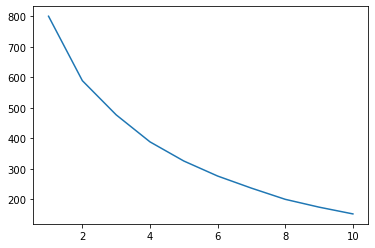

In [134]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [137]:
df_dropped

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,1
1,Male,21,15,81,1,4
2,Female,20,16,6,1,1
3,Female,23,16,77,1,4
4,Female,31,17,40,1,1
...,...,...,...,...,...,...
195,Female,35,120,79,0,2
196,Female,45,126,28,0,3
197,Male,32,126,74,0,2
198,Male,32,137,18,0,3


In [138]:
df_dropped.to_csv('Clustering.csv')